### Import

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import tree
from sklearn import svm

import matplotlib.pyplot as plt
%matplotlib inline

### Read CSV File

In [2]:
df = pd.read_csv('answers.csv')
df.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,4.0,4.0,5.0,4.0,5.0,5.0,4.0,3.0,5.0,5.0,...,4.0,5.0,3.0,5.0,5.0,5.0,4.0,2.0,5.0,5.0
1,2.0,4.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,...,3.0,3.0,3.0,3.0,2.0,3.0,3.0,1.0,3.0,2.0
2,5.0,5.0,1.0,2.0,5.0,5.0,1.0,1.0,5.0,5.0,...,4.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,2.0,1.0,2.0,2.0,3.0,2.0,3.0,2.0,4.0,1.0,...,4.0,3.0,5.0,4.0,4.0,4.0,5.0,2.0,5.0,5.0
4,3.0,5.0,3.0,3.0,3.0,5.0,3.0,5.0,3.0,1.0,...,3.0,5.0,1.0,5.0,3.0,5.0,3.0,1.0,5.0,3.0


## Try Different Models

In [3]:
ys = df[['E1', 'N1', 'A1', 'C1', 'O1']].columns
y = [0]*len(ys)
X_train = [0]*len(ys)
X_test = [0]*len(ys)
y_train = [0]*len(ys)
y_test = [0]*len(ys)

for num,elem in enumerate(ys, start=0):
    y[num] = df[elem]
    X = df[df.columns[10*num+1:10*(num+1)]]
    X_train[num], X_test[num], y_train[num], y_test[num] = train_test_split(X,y[num],test_size=0.2)

### Decision Tree

In [4]:
dt_train = [0]*len(ys)
dt_test = [0]*len(ys)
dt = tree.DecisionTreeRegressor()
for num in range(len(ys)):
    dt = dt.fit(X_train[num], y_train[num])
    dt_train[num] = dt.score(X_train[num], y_train[num])
    dt_test[num] = dt.score(X_test[num], y_test[num])

### SVM

In [5]:
svm_train = [0]*len(ys)
svm_test = [0]*len(ys)
svm = svm.SVR()
for num in range(len(ys)):
    svm = svm.fit(X_train[num], y_train[num])
    svm_train[num] = svm.score(X_train[num], y_train[num])
    svm_test[num] = svm.score(X_test[num], y_test[num])

In [6]:
svm_test

[0.4249336498426638,
 0.43610531317385476,
 0.104425024768948,
 0.2768825569231601,
 0.4435121104003436]

In [7]:
svm_train

[0.48554998400793686,
 0.5262862012370588,
 0.14543413071872158,
 0.3922169889785828,
 0.4987668038166046]

### Nearest Neighbours

In [8]:
neighbours_train = []
neighbours_test = []

for i in range(1,20):
    knn_train = [0]*len(ys)
    knn_test = [0]*len(ys)
    knn = neighbors.KNeighborsRegressor(n_neighbors = i)
    for num in range(len(ys)):
        knn = knn.fit(X_train[num], y_train[num])
        knn_train[num] = knn.score(X_train[num], y_train[num])
        knn_test[num] = knn.score(X_test[num], y_test[num])
    neighbours_train.append(knn_train)
    neighbours_test.append(knn_test)

# Compare Models

### Decision Tree

In [9]:
print(ys)
print(dt_train)
print(dt_test)

Index(['E1', 'N1', 'A1', 'C1', 'O1'], dtype='object')
[0.9206574178982253, 0.9323608313805543, 0.7007964172641923, 0.9321402936547167, 0.8419541628955911]
[-0.13464398332539362, -0.07020935642487869, -0.3517976087497696, -0.38936470124100175, 0.08994238284697853]


### SVM

In [10]:
print(ys)
print(svm_train)
print(svm_test)

Index(['E1', 'N1', 'A1', 'C1', 'O1'], dtype='object')
[0.48554998400793686, 0.5262862012370588, 0.14543413071872158, 0.3922169889785828, 0.4987668038166046]
[0.4249336498426638, 0.43610531317385476, 0.104425024768948, 0.2768825569231601, 0.4435121104003436]


### KNN

In [11]:
neighbours_train = pd.DataFrame(neighbours_train)
neighbours_test = pd.DataFrame(neighbours_test)

Text(0.5,1,'Training Accuracy vs Number of Neighbours')

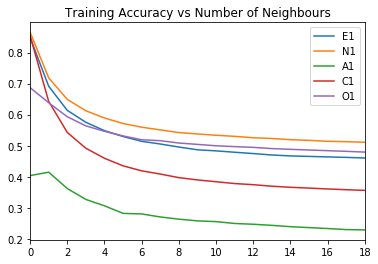

In [13]:
neighbours_train.columns = ys
neighbours_train.plot()
plt.title('Training Accuracy vs Number of Neighbours')

Text(0.5,1,'Testing Accuracy vs Number of Neighbours')

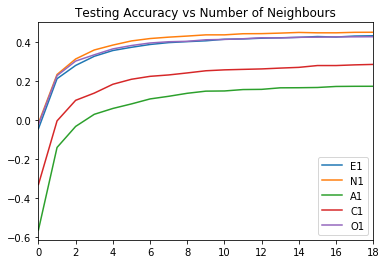

In [14]:
neighbours_test.columns = ys
neighbours_test.plot()
plt.title('Testing Accuracy vs Number of Neighbours')

In [16]:
neighbours_test

,E1,N1,A1,C1,O1
0,-0.079109,0.010354,-0.535171,-0.307945,-0.008483
1,0.194845,0.248992,-0.136847,0.004771,0.243325
2,0.280594,0.337777,-0.019597,0.129473,0.311452
3,0.322147,0.374099,0.035489,0.177944,0.354664
4,0.343585,0.396801,0.072251,0.214897,0.376994
5,0.360237,0.415692,0.089669,0.237780,0.386846
6,0.371612,0.424072,0.103214,0.251451,0.400150
7,0.383582,0.433170,0.119962,0.262003,0.408193
8,0.387364,0.439953,0.122895,0.265636,0.410162
9,0.393702,0.444808,0.131979,0.281863,0.416225
